# Data Preprocessing

## 1. Import Libraries

In [181]:
import re
import pandas as pd 
from tqdm import tqdm
tqdm.pandas()
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.layers import Input
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from matplotlib import pyplot as plt
import keras


## 2. Load and Inspect Data

In [182]:
file_path = "D:\main project\data\spam_or_not_spam.csv"
df = pd.read_csv(file_path)
print(df.head())

                                               email  label
0   date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...      0
1  martin a posted tassos papadopoulos the greek ...      0
2  man threatens explosion in moscow thursday aug...      0
3  klez the virus that won t die already the most...      0
4   in adding cream to spaghetti carbonara which ...      0


In [183]:
print(df.shape)

(3000, 2)


## 3. Get Class Percentage

In [184]:
spam_percentage = (df["label"].value_counts()*100/df.shape[0])[1]
ham_percentage = (df["label"].value_counts()*100/df.shape[0])[0]
print(f"Percentage of spam emails: {spam_percentage:.2f}%")

Percentage of spam emails: 16.67%


## 4. Function to Remove Given RegEx pattern

In [185]:
def remove_pattern(text, pattern):
    cleaned_text = re.sub(pattern, "", str(text))
    return " ".join(cleaned_text.split(" "))

## 5. Remove Unnecessary Patterns

In [186]:
# Lambda expression to remove pattern NUMBER from the text
df["email"] = df["email"].progress_apply(lambda x: remove_pattern(x, "NUMBER"))

# Write Lambda expression to remove pattern URL from the text
df["email"] = df["email"].progress_apply(lambda text: re.sub(r'https?://\S+|www\.\S+', '', text))

# Write Lambda expression to remove underscores from the text

df["email"] = df["email"].progress_apply(lambda text: text.replace("_", ""))

# Write Lambda expression to remove emails from the text

df["email"] = df["email"].progress_apply(lambda text: re.sub(r'\S+@\S+', '', text))


# Write Lambda expression to remove digits

df["email"] = df["email"].progress_apply(lambda text: re.sub(r'\d', '', text))



100%|██████████| 3000/3000 [00:00<00:00, 49171.21it/s]


In [187]:
df

,email,label
0,date wed aug from chris garrigues cwg d...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
...,...,...
2995,abc s good morning america ranks it the chri...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1


## 6. Function to Replace Text

In [188]:
def replace_text(source_pattern, destination_pattern,text):
    text = text.replace(source_pattern, destination_pattern)
    return text

## 7. Decontraction of Phrases

In [189]:
 #Write Lamda Expression to replace pattern won't to will not
df["email"] = df["email"].progress_apply(lambda x: replace_text("won't", "will not", x))


100%|██████████| 3000/3000 [00:00<00:00, 303927.73it/s]


In [190]:

# Write Lamda Expression to replace pattern can't --> can not
df["email"] = df["email"].progress_apply(lambda x: replace_text("can't", "can not", x))


100%|██████████| 3000/3000 [00:00<00:00, 184546.18it/s]


In [191]:

# Write Lamda Expression to replace pattern n't --> not
df["email"] = df["email"].progress_apply(lambda x: replace_text("n't", "not", x))


100%|██████████| 3000/3000 [00:00<00:00, 351389.65it/s]


In [192]:

# Write Lamda Expression to replace pattern 're --> are
df["email"] = df["email"].progress_apply(lambda x: replace_text("re", "are",x))


100%|██████████| 3000/3000 [00:00<00:00, 122965.26it/s]


In [193]:

# Write Lamda Expression to replace pattern 's -> is
df["email"] = df["email"].progress_apply(lambda x: replace_text("s", "is", x))


100%|██████████| 3000/3000 [00:00<00:00, 133354.30it/s]


In [194]:

# Write Lamda Expression to replace pattern 'd -> would
df["email"] = df["email"].progress_apply(lambda x: replace_text("d", "would",x))


100%|██████████| 3000/3000 [00:00<00:00, 109581.47it/s]


In [195]:

# Write Lamda Expression to replace pattern 'll -> will
df["email"] = df["email"].progress_apply(lambda x: replace_text("ll", "will",x))


100%|██████████| 3000/3000 [00:00<00:00, 125994.17it/s]


In [196]:

# Write Lamda Expression to replace pattern 've -> have
df["email"] = df["email"].progress_apply(lambda x: replace_text("ve", "have",x))


100%|██████████| 3000/3000 [00:00<00:00, 105038.79it/s]


In [197]:
# Write function to convert text to lowercase
def convert_to_lowercase(text):
    return text.lower()

df["email"] = df["email"].progress_apply(lambda x: convert_to_lowercase(x))






100%|██████████| 3000/3000 [00:00<00:00, 158614.80it/s]


In [198]:
df

,email,label
0,wouldate wewould aug from chriis garrig...,0
1,martin a poistewould taisisois papawouldopoulo...,0
2,man thareatenis exploision in moiscow thuriswo...,0
3,klez the viruis that won t wouldie alareawould...,0
4,in awouldwoulding caream to ispaghetti carbon...,0
...,...,...
2995,abc is goowould morning america rankis it the...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for ishopping with uis giftis for a...,1
2998,the famouis ebay marketing e courise learn to...,1


In [199]:

# Write function to replace non-alphabets
def replace_non_alphabets(text, replacement=' '):
    return re.sub(r'[^a-zA-Z]+', replacement, text)

df["email"] = df["email"].progress_apply(lambda x: replace_non_alphabets(x, ' '))

100%|██████████| 3000/3000 [00:00<00:00, 8526.42it/s]


In [200]:
df

,email,label
0,wouldate wewould aug from chriis garrigueis c...,0
1,martin a poistewould taisisois papawouldopoulo...,0
2,man thareatenis exploision in moiscow thuriswo...,0
3,klez the viruis that won t wouldie alareawould...,0
4,in awouldwoulding caream to ispaghetti carbon...,0
...,...,...
2995,abc is goowould morning america rankis it the...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for ishopping with uis giftis for a...,1
2998,the famouis ebay marketing e courise learn to...,1


## 8. Convert Feature Column to Categorical

In [201]:


# Example DataFrame with a feature column


# Convert the 'Feature' column to categorical


# Display the DataFrame



## 9. Separate Features and Labels

In [202]:


# Example DataFrame with features and labels


# Separate features and labels
X= df['email']
y=df['label']




# Display the separated features and labels


## 10. Perform Train-Test Split

In [203]:


# Example DataFrame with features and labels


# Separate features and labels


# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
  X,y , random_state=104,test_size=0.25, shuffle=True)



# Display the shapes of the training and testing sets



In [204]:
df

,email,label
0,wouldate wewould aug from chriis garrigueis c...,0
1,martin a poistewould taisisois papawouldopoulo...,0
2,man thareatenis exploision in moiscow thuriswo...,0
3,klez the viruis that won t wouldie alareawould...,0
4,in awouldwoulding caream to ispaghetti carbon...,0
...,...,...
2995,abc is goowould morning america rankis it the...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for ishopping with uis giftis for a...,1
2998,the famouis ebay marketing e courise learn to...,1


## 11. Compute maximum number of words in all emails

In [205]:


# Assuming you have a DataFrame with an 'Emails' column
# Replace 'your_data.csv' with the actual file containing your email data


# Assuming the 'Emails' column contains the text of emails
# You may need to preprocess the text if required (e.g., remove punctuation, lowercasing, etc.)

# Split each email into words and calculate the number of words in each email

# Find the maximum number of words across all emails
length_of_the_messages = df["email"].str.split("\\s+")

max_words=(length_of_the_messages.str.len().max())


## 12. Create Keras preprocessing Tokenizer Object

In [206]:
# Fit Tokenizer object on train data
# Encode X_train and X_test using the Tokenizer object
# Assuming you have a DataFrame with a 'Text' column
# Replace 'your_data.csv' with the actual file containing your text data
# Assuming 'Text' column contains the text data
# Split the data into training and testing sets
# Create a Tokenizer object
# Fit the tokenizer on the training data
# Encode the training and testing data using the fitted tokenizer
# Example of the encoded sequences
# If you want to pad the sequences to have the same length
# Example of the padded sequences

keras_tokenizer=tf.keras.preprocessing.text.Tokenizer(
    num_words=max_words)

keras_tokenizer.fit_on_texts(df["email"])

X_train_sequence=keras_tokenizer.texts_to_sequences(X_train)        
X_test_sequence=keras_tokenizer.texts_to_sequences(X_test)

## 13. Pad Input Sequences using Keras preprocessing pad_sequences function

In [207]:
#Pad the sequences to have the same length

# Display the shapes of the padded sequences

train_pad_sequence=pad_sequences(
X_train_sequence,
    maxlen=1000,
    padding='post',  
)
test_pad_sequence=pad_sequences(
X_test_sequence,
    maxlen=1000,
    padding='post',  
)






In [208]:
train_pad_sequence.shape

(2250, 1000)

## 14. Create Character Embedding 

In [209]:
#Create a Sequential model

# Add an Embedding layer for character embeddings

# Add an LSTM layer (you can use GRU or other recurrent layers as well)


# Add a Dense layer for classification (adjust units based on your specific task)


# Compile the model


# Display the model summary


# Modeling

## 15. Define Model Architecture Using Functional API

In [210]:
# Define the model using the Functional API

# Compile the model


# Display the model summary
input_layer= Input(shape=(1000,))
dense_layer1= Dense(16)(input_layer)
dense_layer2= Dense(32)(dense_layer1)
dense_layer3= Dense(64)(dense_layer2)
dense_layer4= Dense(128)(dense_layer3)
output_layer= Dense(2)(dense_layer4)

## 16. Define Optimizer (e.g. Adam)

In [211]:


# ... (previous code for data preprocessing and model definition)

# Compile the model with the Adam optimizer
optimizer_adam=Adam(
    learning_rate=0.001,

)

## 17. Write class for custom callback for micro-f1 score

## 18. Create Modelcheckpoint Callback

In [212]:
model_checkpoint_callback=keras.callbacks.ModelCheckpoint(
    filepath='D:\source_detection\model\model.hdf5',
    monitor="val_loss",
    verbose=0,
    save_best_only=True,
    save_weights_only=True,
    mode="min",
)

## 19. Create Callback for TensorBoard

## 20. Compile the Model

In [213]:
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer_adam,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"]
              )

## 21. Train the model using model.fit()

In [214]:
history=model.fit(
    x=train_pad_sequence,
    y=y_train,
    batch_size=32,
    epochs=25,
    validation_data=(test_pad_sequence, y_test),
    callbacks=[model_checkpoint_callback]
    )



Epoch 1/25


71/71 [==============================] - 2s 8ms/step - loss: 7.5503 - accuracy: 0.4982 - val_loss: 3.8274 - val_accuracy: 0.3200
Epoch 2/25
71/71 [==============================] - 0s 5ms/step - loss: 3.9711 - accuracy: 0.3347 - val_loss: 3.4628 - val_accuracy: 0.2880
Epoch 3/25
71/71 [==============================] - 0s 5ms/step - loss: 3.1005 - accuracy: 0.2102 - val_loss: 2.7124 - val_accuracy: 0.1787
Epoch 4/25
71/71 [==============================] - 0s 4ms/step - loss: 2.7308 - accuracy: 0.1800 - val_loss: 2.7226 - val_accuracy: 0.1760
Epoch 5/25
71/71 [==============================] - 0s 5ms/step - loss: 2.7341 - accuracy: 0.1800 - val_loss: 2.7328 - val_accuracy: 0.1760
Epoch 6/25
71/71 [==============================] - 0s 4ms/step - loss: 2.7475 - accuracy: 0.1796 - val_loss: 2.7328 - val_accuracy: 0.1760
Epoch 7/25
71/71 [==============================] - 0s 4ms/step - loss: 2.7508 - accuracy: 0.1796 - val_loss: 2.7328 - val_accuracy: 0.1760
Epoch 8/25
71/71 [=============

## 22. Plot Performance Curves Using history object

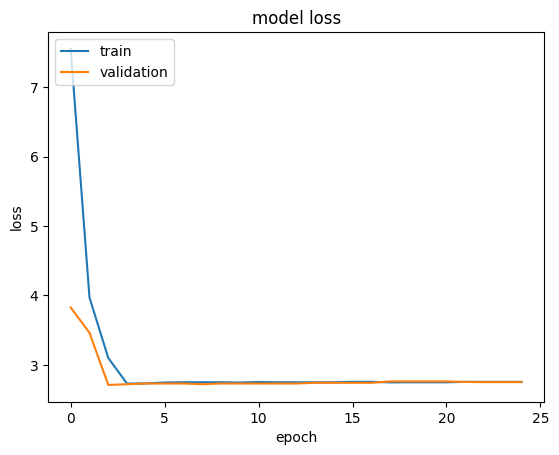

In [215]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## 23. Plot Model Architecture Using keras.utils plot_model function

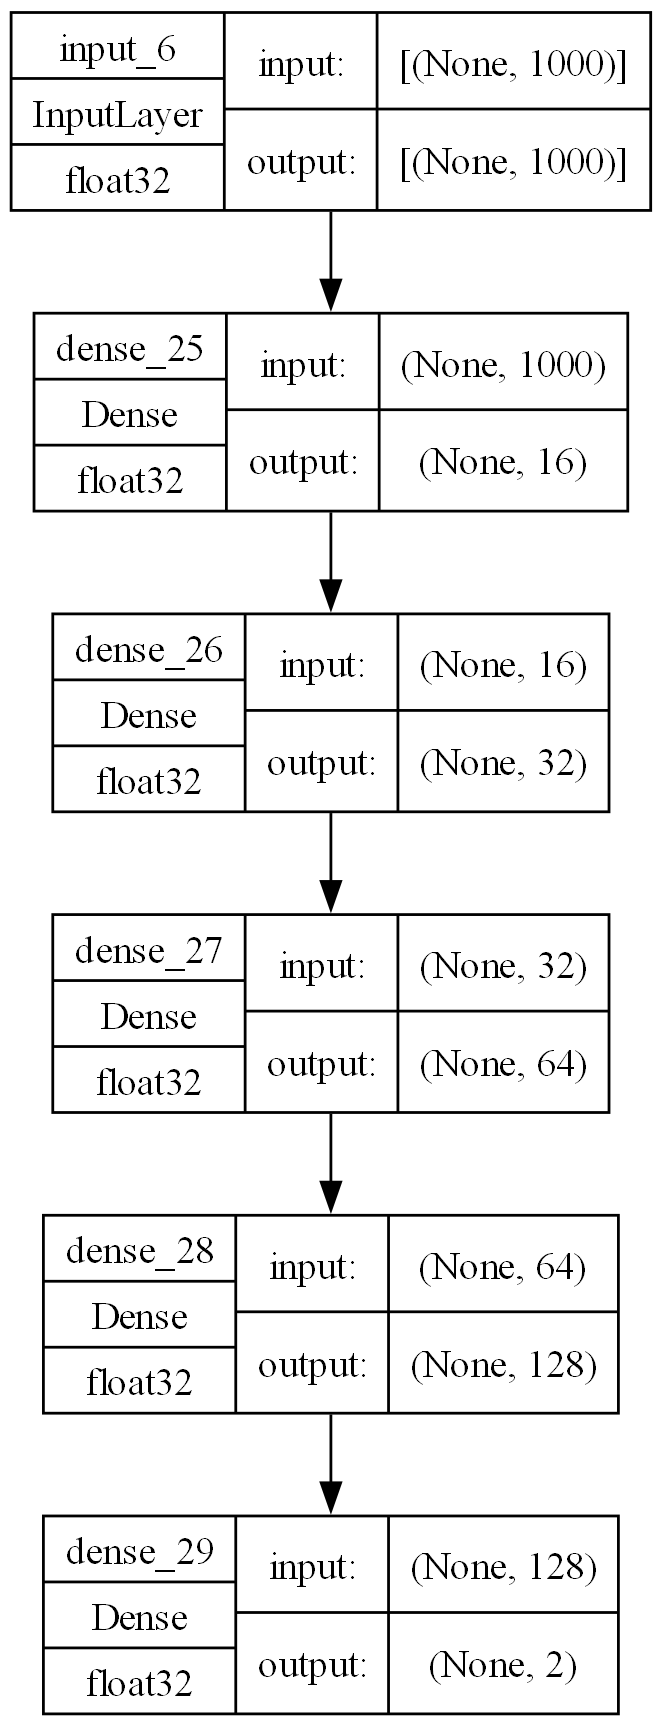

In [216]:
keras.utils.plot_model(
    model,
    to_file="D:\source_detection\plots\model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    dpi=200,
)